In [99]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy

In [100]:
from datetime import datetime
import calendar
import statsmodels.formula.api as smf

In [101]:
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

In [102]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [103]:
from IPython.core.interactiveshell import InteractiveShell

In [104]:
InteractiveShell.ast_node_interactivity = 'all'

In [105]:
pd.set_option('display.max_columns', None)

In [106]:
data = pd.read_csv("/Users/liuwanting/Desktop/pythonhomework/000001.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [107]:
data_new = data['1991-01':'2025-08'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])

In [108]:
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1991-01-02,127.610,127.610,128.840,127.610,128.840,0.009639
1991-01-03,128.840,128.840,130.140,128.840,130.140,0.010090
1991-01-04,130.140,131.270,131.440,130.140,131.440,0.009989
1991-01-07,131.440,131.990,132.060,131.450,132.060,0.004717
1991-01-08,132.060,132.620,132.680,132.060,132.680,0.004695
...,...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562,0.015109
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382,-0.003909
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350,-0.017587


In [109]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Month_data

,Ret
Day,
1991-01-31,0.018494
1991-02-28,0.023390
1991-03-31,-0.096384
1991-04-30,-0.052001
1991-05-31,0.007811
...,...
2025-04-30,-0.017002
2025-05-31,0.020877
2025-06-30,0.028959


In [110]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Quarter_data

,Ret
Day,
1991-03-31,-0.058146
1991-06-30,0.144521
1991-09-30,0.315208
1991-12-31,0.618119
1992-03-31,0.302272
...,...
2024-09-30,0.124383
2024-12-31,0.004575
2025-03-31,-0.004779


In [111]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Year_data

,Ret
Day,
1991-12-31,1.294099
1992-12-31,1.665722
1993-12-31,0.068440
1994-12-31,-0.222991
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750


In [112]:
Month_data['Year'] = Month_data.index.year
Month_data['Month'] = Month_data.index.month
Month_data['Month_name'] = Month_data.index.strftime('%b')
Month_data['Decade'] = (Month_data['Year'] // 10) * 10
Month_data['Rolling_ann_return'] = (1 + Month_data['Ret']).rolling(window=12, min_periods=12).apply(lambda x: np.prod(x) - 1, raw=True)
Month_data['Rolling_ann_vol'] = Month_data['Ret'].rolling(window=12, min_periods=12).std() * np.sqrt(12)
Month_data

,Ret,Year,Month,Month_name,Decade,Rolling_ann_return,Rolling_ann_vol
Day,,,,,,,
1991-01-31,0.018494,1991,1,Jan,1990,NaN,NaN
1991-02-28,0.023390,1991,2,Feb,1990,NaN,NaN
1991-03-31,-0.096384,1991,3,Mar,1990,NaN,NaN
1991-04-30,-0.052001,1991,4,Apr,1990,NaN,NaN
1991-05-31,0.007811,1991,5,May,1990,NaN,NaN
...,...,...,...,...,...,...,...
2025-04-30,-0.017002,2025,4,Apr,2020,0.056108,0.194748
2025-05-31,0.020877,2025,5,May,2020,0.084447,0.194829
2025-06-30,0.028959,2025,6,Jun,2020,0.160754,0.188752


# 月度数据

In [113]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(
    'Ret',
    '.-',
    color = "#1C7C54",
    label = 'Monthly Return',
    linewidth = 3,
    data = Month_data['1991-01-01':'2025-08-29'])
ax.set_title("China's Stock Market Return (1991-2025)")
ax.set_xlabel('Date')
plt.ylabel('Return')

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.xaxis.set_major_locator(mdates.YearLocator(2))

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.xticks(rotation=90)

plt.legend(loc='upper right', frameon=False, fontsize=10)

ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

Text(0.5, 1.0, "China's Stock Market Return (1991-2025)")

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Return')

(array([ 6574.,  7305.,  8035.,  8766.,  9496., 10227., 10957., 11688.,
        12418., 13149., 13879., 14610., 15340., 16071., 16801., 17532.,
        18262., 18993., 19723., 20454., 21184.]),
 [Text(6574.0, 0, '1988'),
  Text(7305.0, 0, '1990'),
  Text(8035.0, 0, '1992'),
  Text(8766.0, 0, '1994'),
  Text(9496.0, 0, '1996'),
  Text(10227.0, 0, '1998'),
  Text(10957.0, 0, '2000'),
  Text(11688.0, 0, '2002'),
  Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006'),
  Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024'),
  Text(20454.0, 0, '2026'),
  Text(21184.0, 0, '2028')])

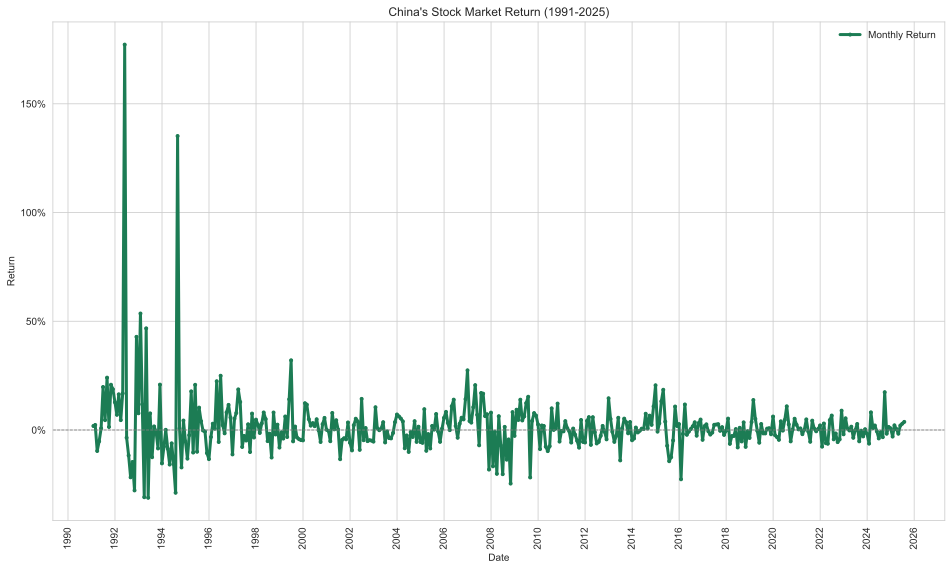

In [114]:
fig.savefig('/Users/liuwanting/Desktop/pythonhomework/Monthly return.pdf', bbox_inches='tight')
plt.show();

In [115]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs
) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on th

# 季度收益

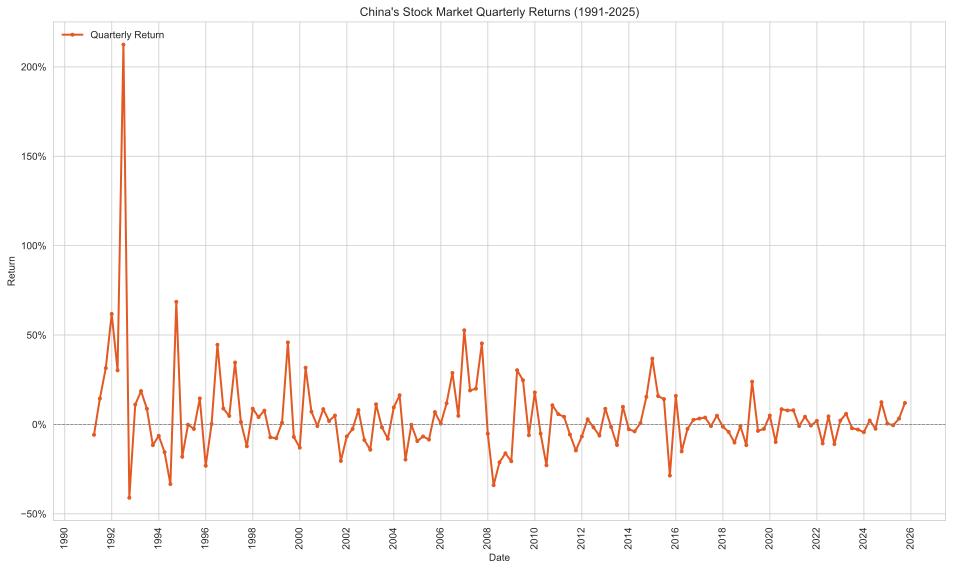

In [116]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(
    Quarter_data.index,
    Quarter_data['Ret'],
    '.-',
    color = "#E35923",
    label = 'Quarterly Return',
    linewidth = 2,
)
ax.set_title("China's Stock Market Quarterly Returns (1991-2025)")
ax.set_xlabel('Date')
plt.ylabel('Return')

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.xaxis.set_major_locator(mdates.YearLocator(2))

plt.xticks(rotation=90)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

plt.legend(loc='upper left', frameon=False, fontsize=10)

fig.savefig('/Users/liuwanting/Desktop/pythonhomework/Monthly return.pdf', bbox_inches='tight')
plt.show();

# 年度收益

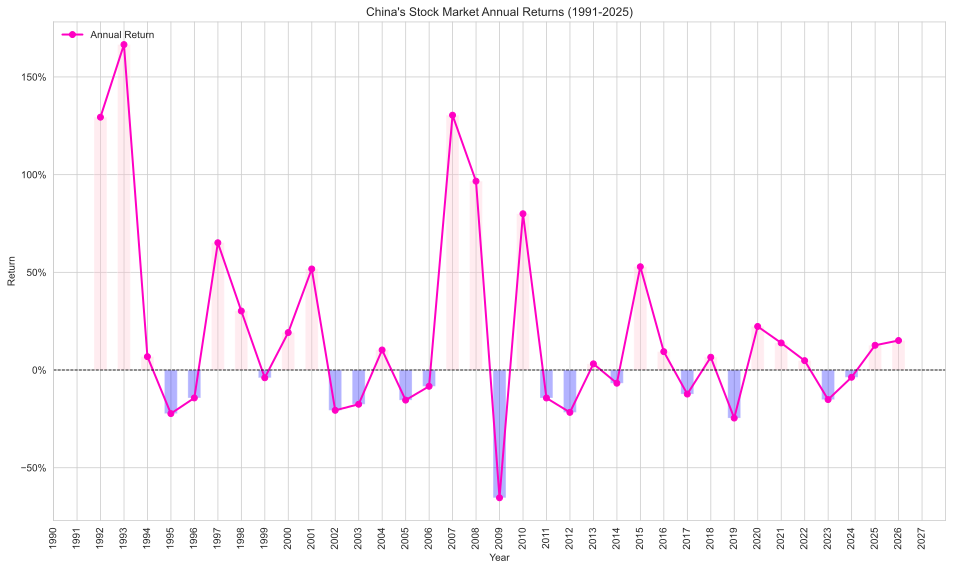

In [117]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(
    Year_data.index,
    Year_data['Ret'],
    'o-',
    color = "#FF00C3",
    label = 'Annual Return',
    linewidth = 2,
)
ax.set_title("China's Stock Market Annual Returns (1991-2025)")
ax.set_xlabel('Year')
plt.ylabel('Return')

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.xaxis.set_major_locator(mdates.YearLocator(1))

plt.xticks(rotation=90)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

for i, year in enumerate(Year_data.index):
    if Year_data['Ret'].iloc[i] >= 0:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='pink')
    else:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='blue')

plt.legend(loc='upper left', frameon=False, fontsize=10)

fig.savefig('/Users/liuwanting/Desktop/pythonhomework/Monthly return.pdf', bbox_inches='tight')
plt.show();

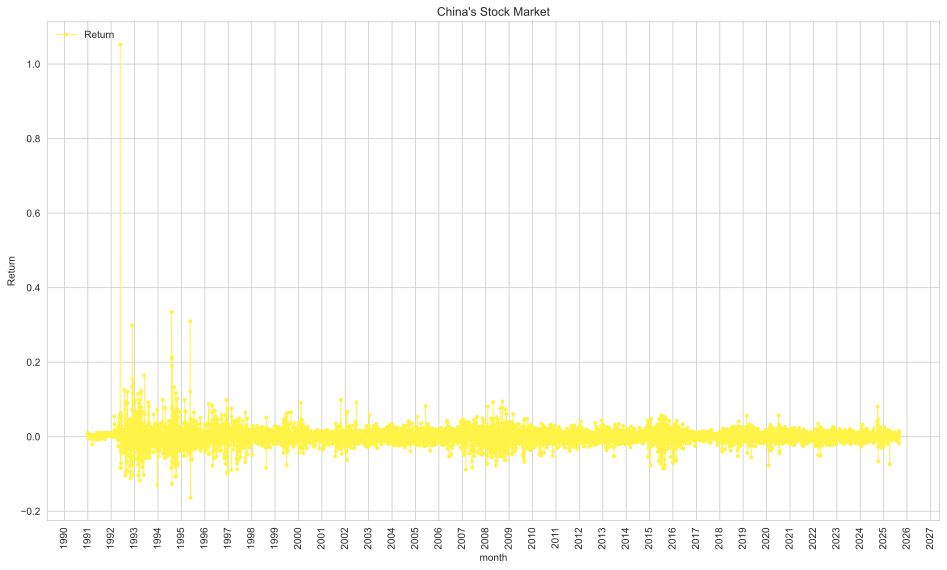

In [118]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(
    'Raw_return',
    '.-',
    color = "#FFF348",
    label = 'Return',
    linewidth = 1,
    data = data_new['1991-01-01':'2025-08-29'])
ax.set_title("China's Stock Market")
ax.set_xlabel('month')
plt.ylabel('Return')

date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

ax.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=90)

plt.legend(loc='upper left', frameon=False, fontsize=10)
fig.savefig('/Users/liuwanting/Desktop/pythonhomework/Daily_return.pdf', bbox_inches='tight')
plt.show();

# 累计收益

In [119]:
data_new['Cum_return'] = (1 + data_new['Raw_return']).cumprod() - 1

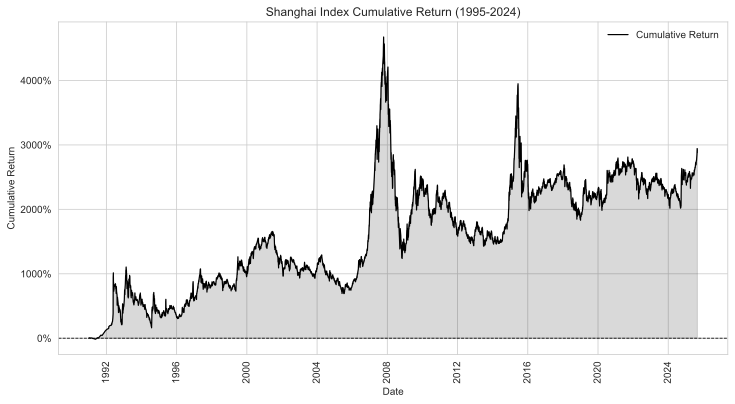

In [120]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_new.index, data_new['Cum_return'], color="#000000", linewidth=1.2, label='Cumulative Return')
ax.fill_between(data_new.index, 0, data_new['Cum_return'], color="#000000", alpha=0.15)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title('Shanghai Index Cumulative Return (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.legend(frameon=False)
fig.savefig('/Users/liuwanting/Desktop/pythonhomework/Cumulative_return.pdf', bbox_inches='tight')
plt.show();

# 最大回撤

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [122]:
data = pd.read_csv("/Users/liuwanting/Desktop/pythonhomework/000001.csv",
    parse_dates=['Day'],
    index_col=['Day'])

In [123]:
data_new = data['1991-01':'2025-08'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])

In [124]:
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1991-01-02,127.610,127.610,128.840,127.610,128.840,0.009639
1991-01-03,128.840,128.840,130.140,128.840,130.140,0.010090
1991-01-04,130.140,131.270,131.440,130.140,131.440,0.009989
1991-01-07,131.440,131.990,132.060,131.450,132.060,0.004717
1991-01-08,132.060,132.620,132.680,132.060,132.680,0.004695
...,...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562,0.015109
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382,-0.003909
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350,-0.017587


In [125]:
data_new['Cum_return'] = (1 + data_new['Raw_return']).cumprod() - 1

In [126]:
data_new['Peak'] = data_new['Cum_return'].cummax()
data_new['Drawdown'] = data_new['Cum_return'] - data_new['Peak']

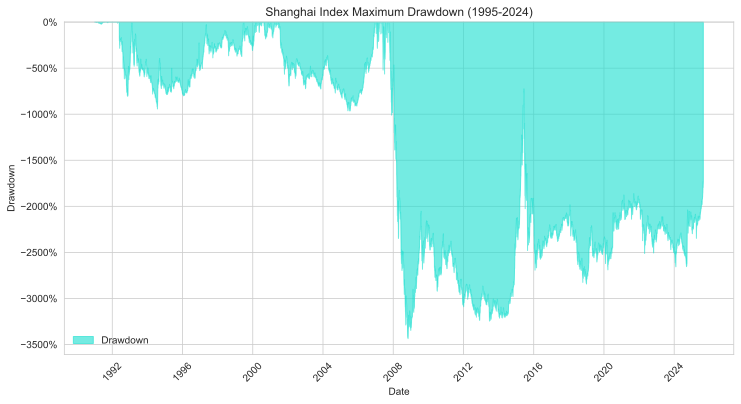

In [127]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.fill_between(data_new.index, data_new['Drawdown'], 0, color="#18DDCF", alpha=0.6, label='Drawdown')
ax.set_title('Shanghai Index Maximum Drawdown (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Drawdown')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(data_new['Drawdown'].min() * 1.05, 0.02)
plt.xticks(rotation=45)
plt.legend(frameon=False)
fig.savefig('/Users/liuwanting/Desktop/pythonhomework/Maximum_drawdown.pdf', bbox_inches='tight')
plt.show();